In [54]:
import pandas as pd, datetime as dt
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
sns.set_theme(color_codes=True)
print(os.getcwd())
os.chdir("C:/Users/joshg/Desktop")

C:\Users\joshg\Desktop


# Load and Describe

In [55]:
df = pd.read_excel('sportsref_download.xlsx')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
0,1,Max Aarons,eng ENG,DF,Norwich City,21-360,2000,18,18,1620,...,0.06,0.6,0.6,0.9,1.4,0.03,0.05,0.08,0.03,0.08
1,2,Che Adams,sct SCO,FW,Southampton,25-170,1996,13,11,868,...,0.41,2.4,2.4,1.4,3.8,0.25,0.15,0.40,0.25,0.40
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-207,2001,9,8,718,...,0.13,0.3,0.3,0.6,0.8,0.04,0.07,0.11,0.04,0.11
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-257,1998,7,6,565,...,0.00,0.2,0.2,0.3,0.5,0.03,0.05,0.07,0.03,0.07
4,5,Nathan Aké,nl NED,DF,Manchester City,26-315,1995,7,5,491,...,0.18,0.3,0.3,0.0,0.3,0.05,0.00,0.05,0.05,0.05


In [56]:
df.shape

(478, 32)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         478 non-null    int64  
 1   Player     478 non-null    object 
 2   Nation     478 non-null    object 
 3   Pos        478 non-null    object 
 4   Squad      478 non-null    object 
 5   Age        478 non-null    object 
 6   Born       478 non-null    int64  
 7   PT_MP      478 non-null    int64  
 8   PT_Starts  478 non-null    int64  
 9   PT_Min     478 non-null    int64  
 10  PT_90s     478 non-null    float64
 11  Gls        478 non-null    int64  
 12  Ast        478 non-null    int64  
 13  G-PK       478 non-null    int64  
 14  PK         478 non-null    int64  
 15  PKatt      478 non-null    int64  
 16  CrdY       478 non-null    int64  
 17  CrdR       478 non-null    int64  
 18  90Gls      478 non-null    float64
 19  90Ast      478 non-null    float64
 20  90G+A     

# Drop Nat Phillips (errored row)

In [58]:
drop = df.loc[df['90xA'] >= 6]
df = df.drop(labels=[463], axis=0)


# xA and xG analysis

In [59]:
mp2 = df[df['PT_MP']>=3]
mp2 = mp2[mp2['Pos']!='GK']

Text(0.78, 0.7, 'Nketiah')

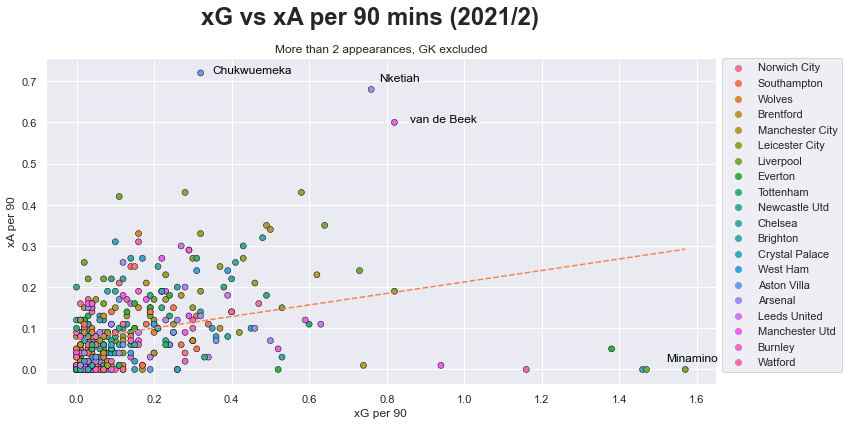

In [60]:
x = mp2['90xG']
y = mp2['90xA']

mpl.rcParams['figure.figsize'] = [12,6]
sns.scatterplot(x=x, y=y, data=mp2, hue='Squad', ec='black')
plt.xlabel('xG per 90')
plt.ylabel('xA per 90')
plt.title('More than 2 appearances, GK excluded',fontsize=12, weight='light')
plt.suptitle('xG vs xA per 90 mins (2021/2)',fontsize=24, y=1, weight='semibold')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='coral', linestyle='--')
plt.legend(bbox_to_anchor=(1.01,1.00), loc="upper left", borderaxespad=0)
plt.text(0.35, 0.72, "Chukwuemeka", horizontalalignment='left', size='medium', color='black')
plt.text(1.52, 0.02, "Minamino", horizontalalignment='left', size='medium', color='black')
plt.text(0.86, 0.6, "van de Beek", horizontalalignment='left', size='medium', color='black')
plt.text(0.78, 0.7, "Nketiah", horizontalalignment='left', size='medium', color='black')


In [61]:
df.loc[df['90xG'] >1.4]

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
95,96,Troy Deeney,eng ENG,FW,Watford,33-184,1988,2,0,25,...,0.00,0.4,0.4,0.1,0.5,1.45,0.32,1.77,1.45,1.77
292,293,Takumi Minamino,jp JPN,"FW,MF",Liverpool,26-348,1995,6,0,46,...,1.96,0.8,0.8,0.0,0.8,1.57,0.00,1.57,1.57,1.57
313,314,Mark Noble,eng ENG,MF,West Ham,34-236,1987,3,1,94,...,0.00,1.5,0.0,0.0,0.0,1.46,0.00,1.46,0.00,0.00
321,322,Divock Origi,be BEL,FW,Liverpool,26-256,1995,3,0,41,...,4.39,0.7,0.7,0.0,0.7,1.47,0.00,1.47,1.47,1.47


In [62]:
squadgroup = df.drop(columns=['Player', 'Nation', 'Pos', 'Age', 'Born', 'Rk'])
squadgroup.head()

,Squad,PT_MP,PT_Starts,PT_Min,PT_90s,Gls,Ast,G-PK,PK,PKatt,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
0,Norwich City,18,18,1620,18.0,0,1,0,0,0,...,0.06,0.6,0.6,0.9,1.4,0.03,0.05,0.08,0.03,0.08
1,Southampton,13,11,868,9.6,3,1,3,0,0,...,0.41,2.4,2.4,1.4,3.8,0.25,0.15,0.40,0.25,0.40
2,Wolves,9,8,718,8.0,0,1,0,0,0,...,0.13,0.3,0.3,0.6,0.8,0.04,0.07,0.11,0.04,0.11
3,Brentford,7,6,565,6.3,0,0,0,0,0,...,0.00,0.2,0.2,0.3,0.5,0.03,0.05,0.07,0.03,0.07
4,Manchester City,7,5,491,5.5,1,0,1,0,0,...,0.18,0.3,0.3,0.0,0.3,0.05,0.00,0.05,0.05,0.05


# By Squad (Grouped)

In [63]:
squadgroup = squadgroup.groupby('Squad', as_index=False).sum()
squadgroup

,Squad,PT_MP,PT_Starts,PT_Min,PT_90s,Gls,Ast,G-PK,PK,PKatt,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
0,Arsenal,266,209,18754,208.5,32,23,31,1,4,...,5.22,29.4,26.2,18.1,44.7,4.22,2.82,7.03,3.91,6.72
1,Aston Villa,252,198,17779,197.3,22,18,20,2,2,...,4.42,18.7,17.1,13.4,30.4,2.30,1.75,4.04,2.05,3.80
2,Brentford,251,198,17793,197.8,20,11,17,3,3,...,3.47,21.9,19.6,13.4,33.3,1.95,1.32,3.29,1.80,3.15
3,Brighton,251,198,17819,198.1,17,14,14,3,3,...,3.11,20.5,18.3,12.8,31.1,2.93,1.47,4.42,2.69,4.18
4,Burnley,205,165,14850,165.1,13,12,13,0,0,...,2.87,15.5,15.5,11.4,26.7,2.15,1.32,3.44,2.15,3.44
5,Chelsea,278,220,19754,219.5,42,28,35,7,7,...,6.57,38.4,33.0,26.3,59.6,4.51,2.85,7.38,4.16,7.02
6,Crystal Palace,262,209,18756,208.4,27,17,24,3,3,...,4.67,23.2,20.9,15.7,36.8,2.22,1.63,3.88,2.05,3.70
7,Everton,231,187,16829,187.0,21,16,18,3,3,...,4.82,21.1,18.8,13.6,32.6,3.94,1.26,5.21,3.34,4.60
8,Leeds United,248,198,17789,197.7,18,11,14,4,4,...,2.81,22.7,19.6,14.6,34.3,2.84,1.43,4.24,2.61,4.01
9,Leicester City,250,198,17769,197.3,31,24,30,1,1,...,7.18,27.7,27.0,17.9,45.0,3.36,2.45,5.79,3.30,5.73


Text(2.12, 2.07, 'Norwich City')

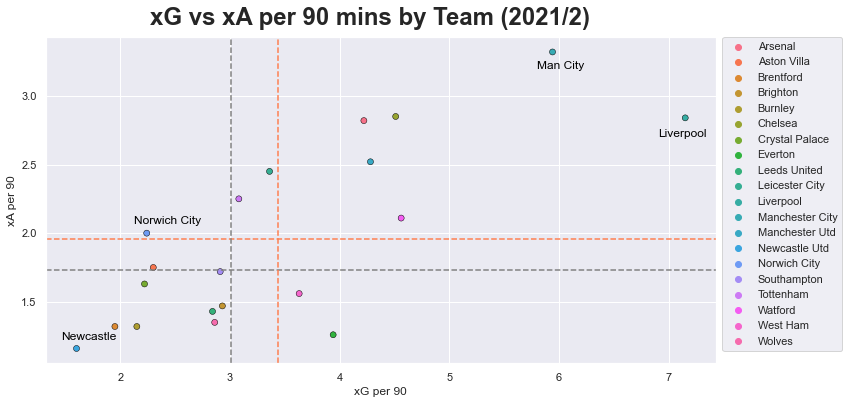

In [64]:
x = squadgroup['90xG']
y = squadgroup['90xA']

mpl.rcParams['figure.figsize'] = [12,6]
sns.scatterplot(x=x, y=y, data=squadgroup, hue='Squad', ec='black')
plt.xlabel('xG per 90')
plt.ylabel('xA per 90')
plt.suptitle('xG vs xA per 90 mins by Team (2021/2)',fontsize=24, y=0.95, weight='semibold')

plt.legend(bbox_to_anchor=(1.01,1.00), loc="upper left", borderaxespad=0)
plt.axhline(y=y.mean(), color='coral', linestyle='--')
plt.axhline(y=y.median(), color='grey', linestyle='--')
plt.axvline(x=x.mean(), color='coral', linestyle='--')
plt.axvline(x=x.median(), color='grey', linestyle='--')
plt.text(5.8, 3.2, "Man City", horizontalalignment='left', size='medium', color='black')
plt.text(6.9, 2.7, "Liverpool", horizontalalignment='left', size='medium', color='black')
plt.text(1.46, 1.225, "Newcastle", horizontalalignment='left', size='medium', color='black')
plt.text(2.12, 2.07, "Norwich City", horizontalalignment='left', size='medium', color='black')

Text(0.5, 1.0, 'xG vs Goals by Team (2021/2)')

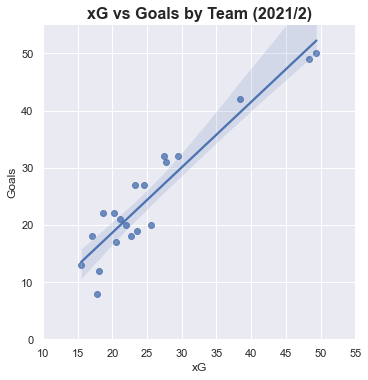

In [65]:
mpl.rcParams['figure.figsize'] = [18,12]
sns.lmplot( x='xG', y='Gls', data=squadgroup, legend=True)
plt.xlabel('xG')
plt.ylabel('Goals')
plt.xlim(10,55)
plt.ylim(0,55)
plt.title('xG vs Goals by Team (2021/2)',fontsize=16, weight='semibold')

# FW Filtered

In [66]:
fw = df[df['Pos'].str.contains("FW")]
fw

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
1,2,Che Adams,sct SCO,FW,Southampton,25-170,1996,13,11,868,...,0.41,2.4,2.4,1.4,3.8,0.25,0.15,0.40,0.25,0.40
5,6,Marc Albrighton,eng ENG,"DF,FW",Leicester City,32-042,1989,8,4,430,...,0.21,0.5,0.5,0.3,0.8,0.10,0.07,0.16,0.10,0.16
10,11,Dele Alli,eng ENG,"MF,FW",Tottenham,25-263,1996,10,8,657,...,0.00,1.5,0.7,0.8,1.5,0.20,0.11,0.31,0.10,0.21
16,17,Michail Antonio,jm JAM,FW,West Ham,31-277,1990,18,17,1570,...,0.69,6.7,6.5,4.1,10.6,0.39,0.24,0.62,0.37,0.61
17,18,Cameron Archer,eng ENG,"MF,FW",Aston Villa,20-162,2001,3,0,27,...,0.00,0.0,0.0,0.0,0.0,0.07,0.00,0.07,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,469,Chris Wood,nz NZL,FW,Burnley,30-023,1991,15,15,1194,...,0.23,3.8,3.8,0.2,4.0,0.28,0.02,0.30,0.28,0.30
471,472,Andriy Yarmolenko,ua UKR,"FW,MF",West Ham,32-068,1989,9,0,70,...,0.00,0.1,0.1,0.0,0.1,0.14,0.04,0.18,0.14,0.18
472,473,Ashley Young,eng ENG,"FW,DF",Aston Villa,36-174,1985,12,7,733,...,0.25,0.4,0.4,0.2,0.6,0.05,0.03,0.07,0.05,0.07
473,474,Wilfried Zaha,ci CIV,FW,Crystal Palace,29-050,1992,17,16,1391,...,0.26,3.5,1.9,3.0,4.9,0.22,0.19,0.42,0.13,0.32


Text(0.5, 1.0, 'FW xG vs xA')

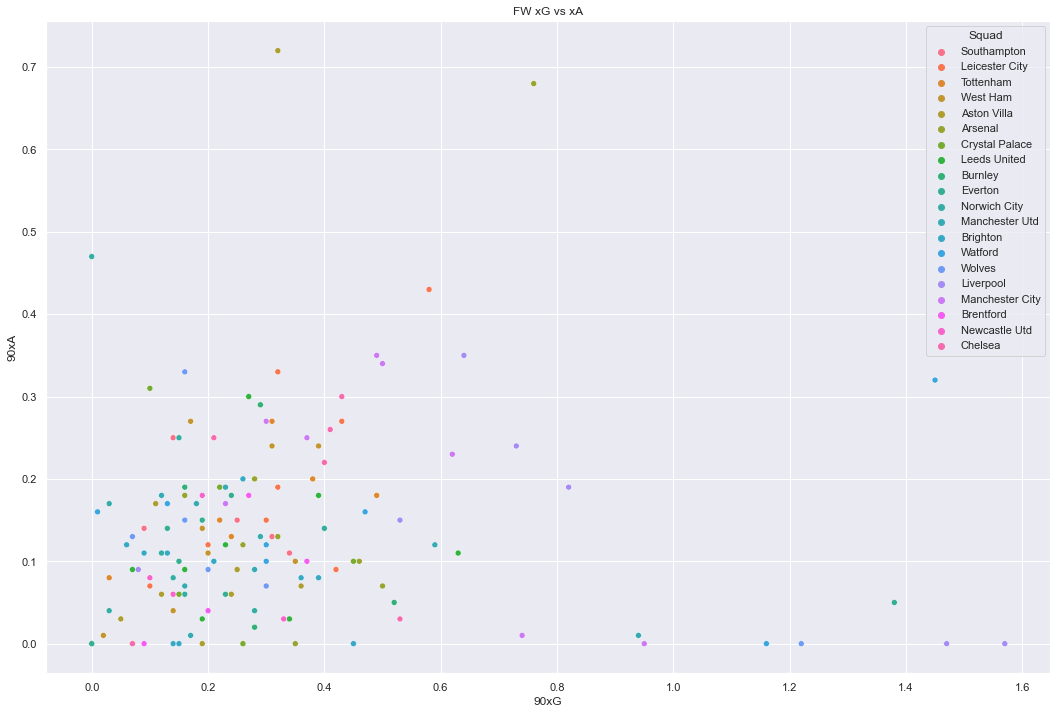

In [67]:
mpover1 = fw[fw['PT_MP']>0]

sns.scatterplot(x=mpover1['90xG'], y=mpover1['90xA'], data=mpover1, hue='Squad')
plt.title('FW xG vs xA')


In [68]:
mpover1.loc[mpover1['90xG']>1.4]

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,90G+A-PK,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA
95,96,Troy Deeney,eng ENG,FW,Watford,33-184,1988,2,0,25,...,0.00,0.4,0.4,0.1,0.5,1.45,0.32,1.77,1.45,1.77
292,293,Takumi Minamino,jp JPN,"FW,MF",Liverpool,26-348,1995,6,0,46,...,1.96,0.8,0.8,0.0,0.8,1.57,0.00,1.57,1.57,1.57
321,322,Divock Origi,be BEL,FW,Liverpool,26-256,1995,3,0,41,...,4.39,0.7,0.7,0.0,0.7,1.47,0.00,1.47,1.47,1.47


In [69]:
goals = squadgroup[["Squad", "Gls", "xG", "90xG", "xA", '90xA', 'Ast']]
goals.head()


,Squad,Gls,xG,90xG,xA,90xA,Ast
0,Arsenal,32,29.4,4.22,18.1,2.82,23
1,Aston Villa,22,18.7,2.30,13.4,1.75,18
2,Brentford,20,21.9,1.95,13.4,1.32,11
3,Brighton,17,20.5,2.93,12.8,1.47,14
4,Burnley,13,15.5,2.15,11.4,1.32,12


<AxesSubplot:xlabel='Gls', ylabel='xG'>

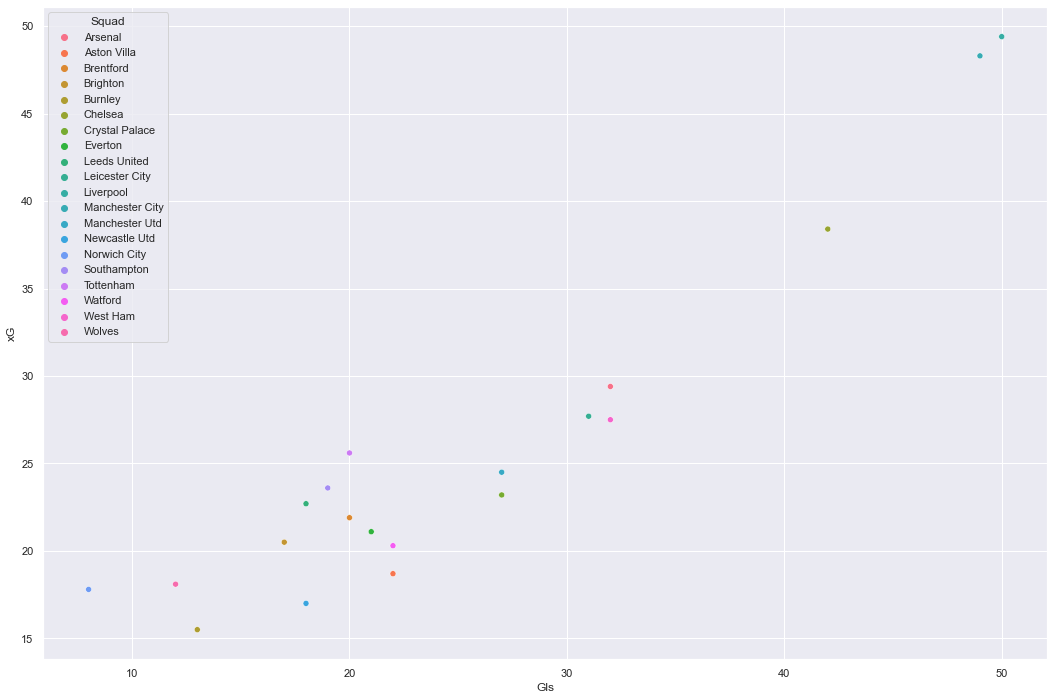

In [70]:
sns.scatterplot(x=goals['Gls'], y=goals['xG'], data=goals, hue='Squad')

<ipython-input-71-188ffe3e176a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['xG_vs_Gls'] = goals["Gls"] - goals["xG"]


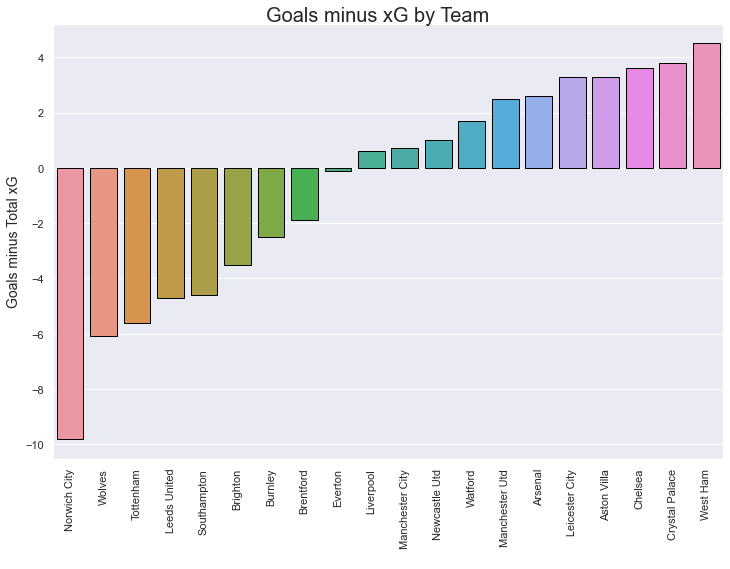

In [71]:
mpl.rcParams['figure.figsize'] = [12,8]
goals['xG_vs_Gls'] = goals["Gls"] - goals["xG"]
ax = sns.barplot(x='Squad', y='xG_vs_Gls', data=goals, ec='black', order=goals.sort_values('xG_vs_Gls').Squad)
plt.xticks(rotation='90')
plt.ylabel('Goals minus Total xG', fontsize=14)
plt.xlabel(" ")
plt.suptitle("Goals minus xG by Team", y=0.91, fontsize=20)
plt.show()

<ipython-input-72-439c78de008e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['xA_vs_Ast'] = goals["xA"] - goals["Ast"]


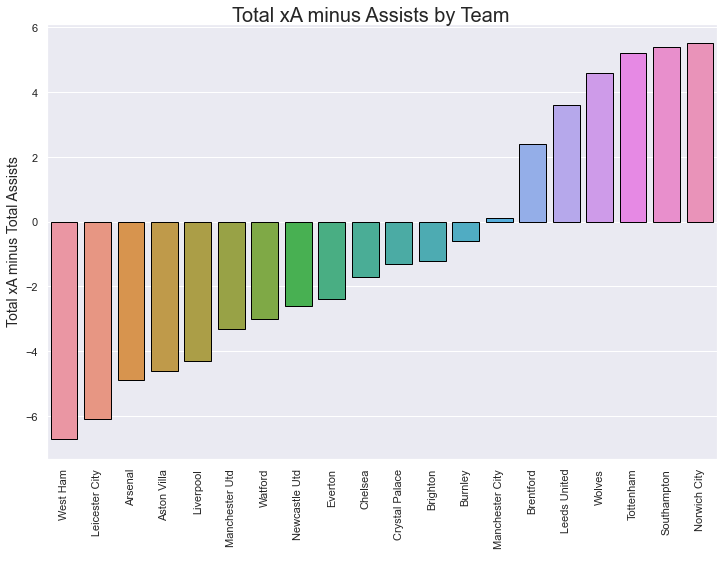

In [72]:
mpl.rcParams['figure.figsize'] = [12,8]
goals['xA_vs_Ast'] = goals["xA"] - goals["Ast"]
ax = sns.barplot(x='Squad', y='xA_vs_Ast', data=goals, ec='black', order=goals.sort_values('xA_vs_Ast').Squad)
plt.xticks(rotation='90')
plt.ylabel('Total xA minus Total Assists', fontsize=14)
plt.xlabel(" ")
plt.suptitle("Total xA minus Assists by Team", y=0.91, fontsize=20)
plt.show()

<ipython-input-73-6bd8b4ad757c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goals['G_A'] = goals["Gls"] - goals["Ast"]


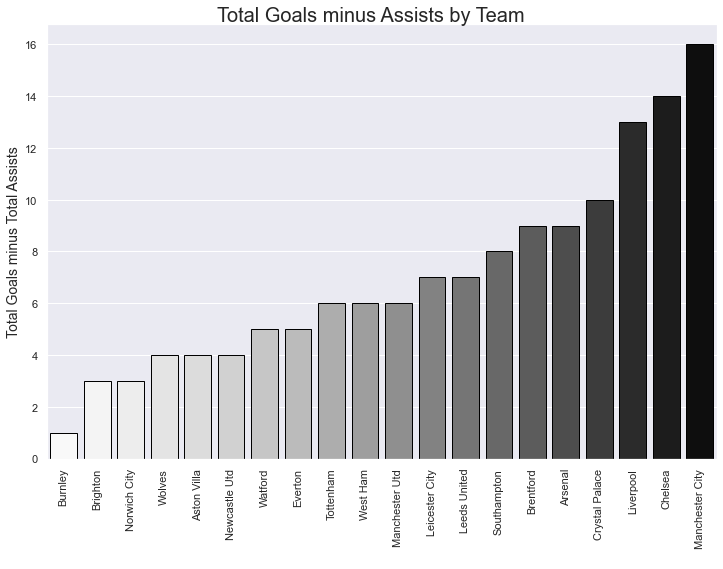

In [73]:
mpl.rcParams['figure.figsize'] = [12,8]
goals['G_A'] = goals["Gls"] - goals["Ast"]
ax = sns.barplot(x='Squad', y='G_A', data=goals, ec='black', palette='Greys', order=goals.sort_values('G_A').Squad)
plt.xticks(rotation='90')
plt.ylabel('Total Goals minus Total Assists', fontsize=14)
plt.xlabel(" ")
plt.suptitle("Total Goals minus Assists by Team", y=0.91, fontsize=20)
plt.show()

In [74]:
goals.head()

,Squad,Gls,xG,90xG,xA,90xA,Ast,xG_vs_Gls,xA_vs_Ast,G_A
0,Arsenal,32,29.4,4.22,18.1,2.82,23,2.6,-4.9,9
1,Aston Villa,22,18.7,2.30,13.4,1.75,18,3.3,-4.6,4
2,Brentford,20,21.9,1.95,13.4,1.32,11,-1.9,2.4,9
3,Brighton,17,20.5,2.93,12.8,1.47,14,-3.5,-1.2,3
4,Burnley,13,15.5,2.15,11.4,1.32,12,-2.5,-0.6,1


In [75]:
goldenboot = df.nlargest(10, 'Gls')

Text(0.5, 1.0, 'Data as of 20 December 2021')

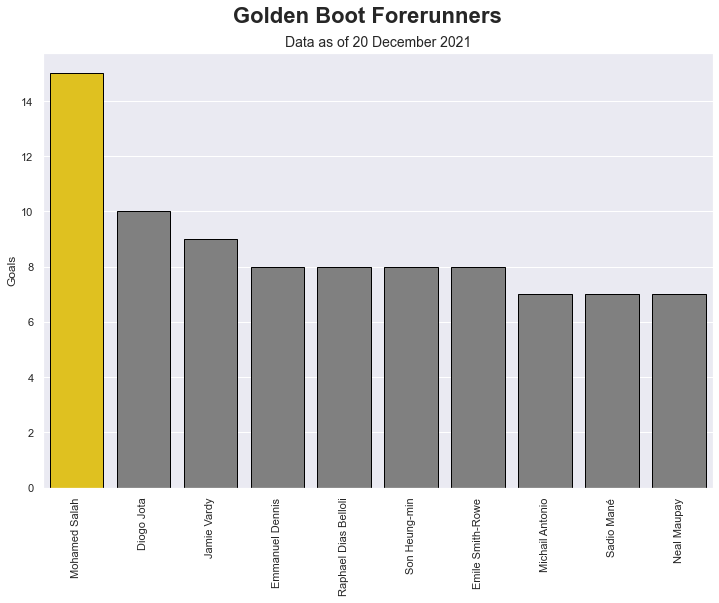

In [76]:
clrs = ['grey' if (x < max(goldenboot.Gls)) else 'gold' for x in goldenboot.Gls]

sns.barplot(x=goldenboot['Player'], y=goldenboot['Gls'], data=goldenboot, ec='black',  palette=clrs)
plt.xticks(rotation=90)
plt.ylabel("Goals")
plt.xlabel("")
plt.suptitle("Golden Boot Forerunners", fontsize=22, fontweight='semibold', y=0.96)
plt.title("Data as of 20 December 2021", fontsize=14)

Text(0.5, 1.0, 'Data as of 20 December 2021')

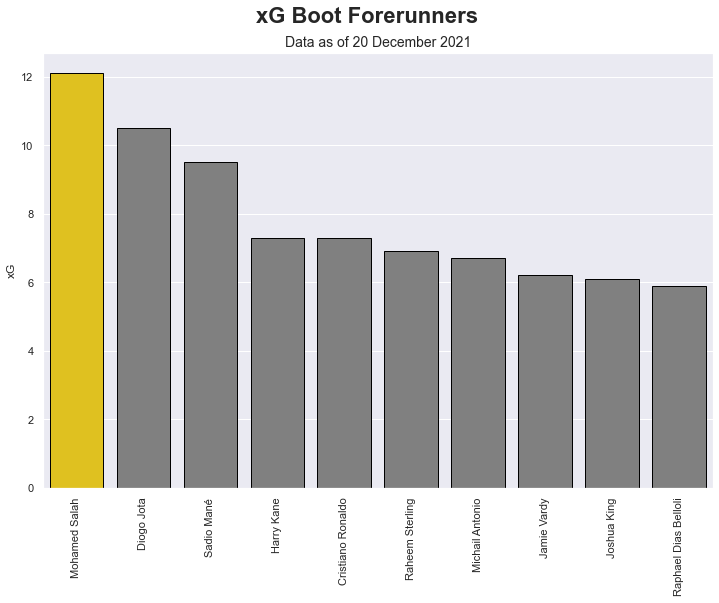

In [77]:
xgboot = df.nlargest(10, 'xG')

clrs = ['grey' if (x < max(xgboot.Gls)) else 'gold' for x in xgboot.Gls]

sns.barplot(x=xgboot['Player'], y=xgboot['xG'], data=xgboot, ec='black',  palette=clrs)
plt.xticks(rotation=90)
plt.ylabel("xG")
plt.xlabel("")
plt.suptitle("xG Boot Forerunners", fontsize=22, fontweight='semibold', y=0.96)
plt.title("Data as of 20 December 2021", fontsize=14)

In [78]:
df['Glsminusxg'] = df['Gls'] - df['xG']
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA,Glsminusxg
0,1,Max Aarons,eng ENG,DF,Norwich City,21-360,2000,18,18,1620,...,0.6,0.6,0.9,1.4,0.03,0.05,0.08,0.03,0.08,-0.6
1,2,Che Adams,sct SCO,FW,Southampton,25-170,1996,13,11,868,...,2.4,2.4,1.4,3.8,0.25,0.15,0.40,0.25,0.40,0.6
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20-207,2001,9,8,718,...,0.3,0.3,0.6,0.8,0.04,0.07,0.11,0.04,0.11,-0.3
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23-257,1998,7,6,565,...,0.2,0.2,0.3,0.5,0.03,0.05,0.07,0.03,0.07,-0.2
4,5,Nathan Aké,nl NED,DF,Manchester City,26-315,1995,7,5,491,...,0.3,0.3,0.0,0.3,0.05,0.00,0.05,0.05,0.05,0.7


In [79]:
xg_gls = df.nlargest(10, 'Glsminusxg')

xg_gls.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA,Glsminusxg
403,404,Emile Smith-Rowe,eng ENG,"MF,FW",Arsenal,21-155,2000,17,13,1186,...,3.4,3.4,1.6,5.0,0.26,0.12,0.38,0.26,0.38,4.6
98,99,Emmanuel Dennis,ng NGA,"FW,MF",Watford,24-045,1997,16,15,1258,...,4.2,4.2,1.7,5.9,0.30,0.12,0.42,0.30,0.42,3.8
79,80,Maxwel Cornet,ci CIV,"FW,MF",Burnley,25-094,1996,9,8,562,...,1.5,1.5,0.5,2.1,0.25,0.09,0.33,0.25,0.33,3.5
396,397,Bernardo Silva,pt POR,"MF,FW",Manchester City,27-142,1994,19,19,1612,...,4.0,4.0,3.5,7.5,0.22,0.19,0.42,0.22,0.42,3.0
375,376,Mohamed Salah,eg EGY,FW,Liverpool,29-198,1992,19,19,1692,...,12.1,9.6,6.6,16.3,0.64,0.35,1.00,0.51,0.87,2.9


Text(0.5, 1.0, 'Data as of 20 December 2021 - Avg Line is avg MF & FW')

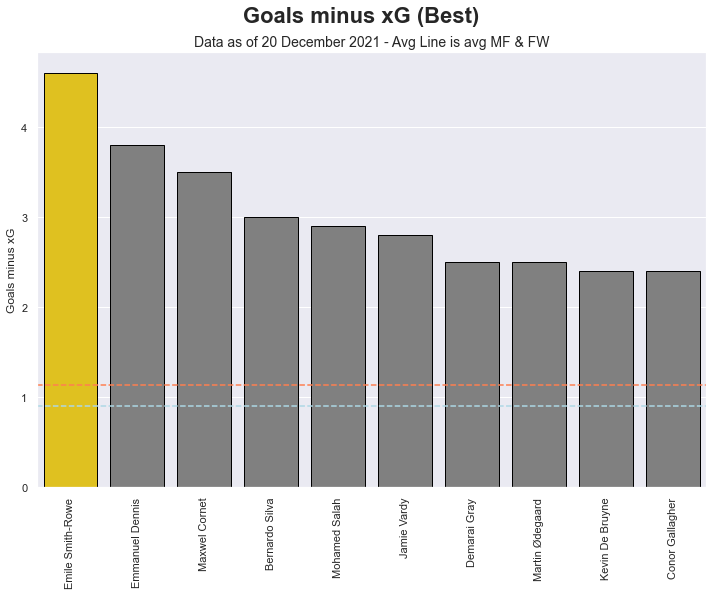

In [80]:
attack = df[(df['Pos'].str.contains("FW")) | (df['Pos'].str.contains("MF"))]

xgover0 = attack.loc[attack['Glsminusxg']>0]

clrs = ['grey' if (x < max(xg_gls.Glsminusxg)) else 'gold' for x in xg_gls.Glsminusxg]

sns.barplot(x=xg_gls['Player'], y=xg_gls['Glsminusxg'], data=xg_gls, ec='black',  palette=clrs)
plt.axhline(y=xgover0['Glsminusxg'].mean(), color='coral', linestyle='--')
plt.axhline(y=xgover0['Glsminusxg'].median(), color='lightblue', linestyle='--')
plt.xticks(rotation=90)
plt.ylabel("Goals minus xG")
plt.xlabel("")
plt.suptitle("Goals minus xG (Best)", fontsize=22, fontweight='semibold', y=0.96)
plt.title("Data as of 20 December 2021 - Avg Line is avg MF & FW", fontsize=14)

In [81]:
xg_gls_low = df.nsmallest(10, 'Glsminusxg')

xg_gls_low.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,PT_MP,PT_Starts,PT_Min,...,xG,npxG,xA,npxG+xA,90xG,90xA,90xG+xA,90npxG,90npxG+xA,Glsminusxg
209,210,Harry Kane,eng ENG,FW,Tottenham,28-155,1993,16,15,1342,...,7.3,6.5,2.7,9.2,0.49,0.18,0.67,0.44,0.62,-3.3
199,200,Gabriel Jesus,br BRA,FW,Manchester City,24-271,1997,16,14,1228,...,5.1,5.1,3.4,8.4,0.37,0.25,0.62,0.37,0.62,-3.1
436,437,Francisco Trincão,pt POR,"FW,MF",Wolves,22-001,1999,14,10,795,...,2.6,2.6,0.6,3.3,0.30,0.07,0.37,0.30,0.37,-2.6
46,47,Jarrod Bowen,eng ENG,FW,West Ham,25-010,1996,19,18,1584,...,5.5,5.5,4.2,9.7,0.31,0.24,0.55,0.31,0.55,-2.5
260,261,Sadio Mané,sn SEN,FW,Liverpool,29-264,1992,19,18,1622,...,9.5,9.5,2.7,12.2,0.53,0.15,0.68,0.53,0.68,-2.5


Text(0.5, 1.0, 'Data as of 20 December 2021')

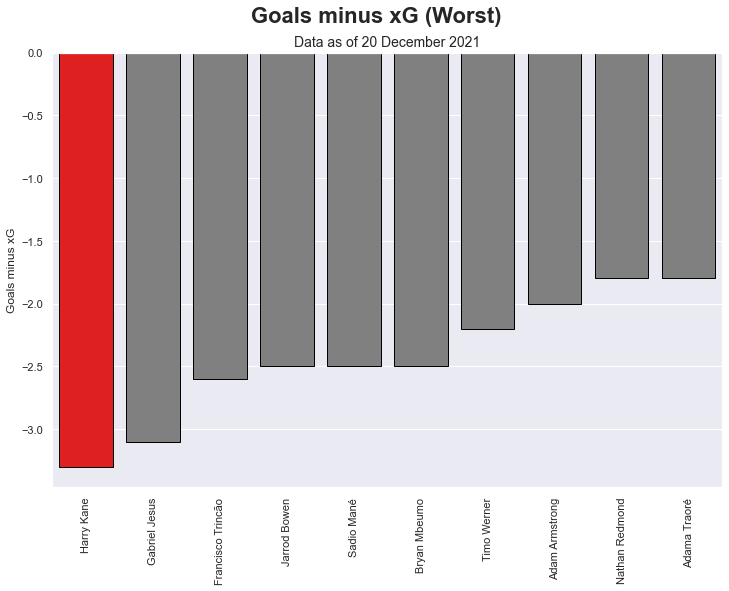

In [82]:
clrs = ['grey' if (x > min(xg_gls_low.Glsminusxg)) else 'red' for x in xg_gls_low.Glsminusxg]

sns.barplot(x=xg_gls_low['Player'], y=xg_gls_low['Glsminusxg'], data=xg_gls_low, ec='black',  palette=clrs)
plt.xticks(rotation=90)
plt.ylabel("Goals minus xG")
plt.xlabel("")
plt.suptitle("Goals minus xG (Worst)", fontsize=22, fontweight='semibold', y=0.96)
plt.title("Data as of 20 December 2021", fontsize=14)

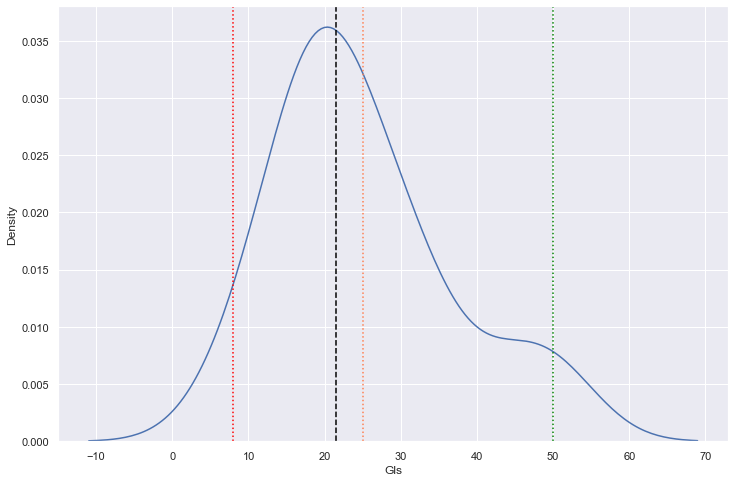

In [97]:
sns.kdeplot(data=squadgroup, x="Gls")
plt.axvline(squadgroup.Gls.median(), color="black", linestyle="--")
plt.axvline(squadgroup.Gls.mean(), color="coral", linestyle=":")
plt.axvline(squadgroup.Gls.min(), color="red", linestyle=":")
plt.axvline(squadgroup.Gls.max(), color="green", linestyle=":")